In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('amazon.csv', encoding='iso-8859-1', parse_dates= ['date'])

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [5]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [6]:
df.shape

(6454, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [8]:
df.duplicated().any()

np.True_

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(6422, 5)

In [11]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
df.describe()

,year,number,date
count,6422.000000,6422.000000,6422
mean,2007.490969,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,0.000000,1998-01-01 00:00:00
25%,2003.000000,3.000000,2003-01-01 00:00:00
50%,2007.000000,24.497000,2007-01-01 00:00:00
75%,2012.000000,114.000000,2012-01-01 00:00:00
max,2017.000000,998.000000,2017-01-01 00:00:00
std,5.731806,191.142482,NaN


In [25]:
df6=df[df['state'] =='Amazonas']
df6

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [34]:
import calendar

day = df6.groupby(df6['date'].dt.dayofweek).sum(numeric_only=True)['number']

day.index = [calendar.day_name[x] for x in day.index]

day = day.reset_index()
day.columns = ['Day', 'Number']

print(day)


         Day    Number
0     Monday  1886.601
1    Tuesday  6474.217
2  Wednesday  3910.177
3   Thursday  5754.802
4     Friday  5446.480
5   Saturday  4162.666
6     Sunday  3015.186


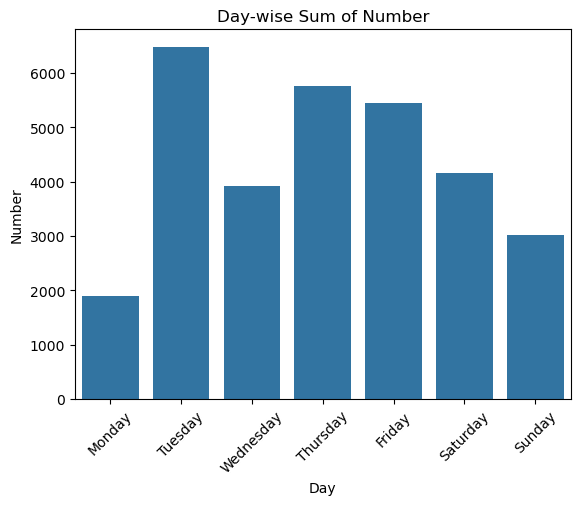

In [36]:
sns.barplot(x='Day', y='Number', data=day)
plt.xticks(rotation=45)
plt.title("Day-wise Sum of Number")
plt.show()

In [39]:
fire = df[df['year'] == 2015].groupby('month_new')['number'].sum().reset_index()

In [40]:
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,may,2384.000
8,nov,4034.518
9,oct,4499.525


In [42]:
df.groupby('state')['number'].mean().sort_values(ascending=False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64